# Telecom Customer Churn & Revenue Analysis

## 1️⃣ Business Problem
Customer churn is a major challenge for telecom companies.  
Churn occurs when a customer **leaves the company for a competitor**, which can result in **lost revenue** and increased costs to acquire new customers.  

**Business goal:**  
- Identify customers who are likely to churn.  
- Understand key factors driving churn.  
- Recommend strategies to **retain high-risk, high-value customers**.  

---

## 2️⃣ Dataset Description
The dataset used is the **Telco Customer Churn dataset** from Kaggle, containing **7043 customer records** with 21 attributes:  

- **Customer info:**`gender`, `SeniorCitizen`, `Partner`, `Dependents`  
- **Account info:**`tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`  
- **Services subscribed:**`PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`  
- **Charges:**`MonthlyCharges`, `TotalCharges`  
- **Target variable:**`Churn` (Yes/No)  

**Data type mix:**  
- Numeric: `tenure`, `MonthlyCharges`, `TotalCharges`  
- Categorical: Most service and account columns  
- Target: `Churn` (binary outcome)  

---

## 3️⃣ Objective of Analysis
1. Clean and preprocess the data for analysis.  
2. Engineer meaningful features like `RevenuePerMonth` and service interactions.  
3. Explore the data to uncover **patterns in churn**.  
4. Train and evaluate machine learning models to **predict churn**.  
5. Identify **key features and actionable insights** for business retention strategies.  

---

## 4️⃣ Expected Outcome
- Predict which customers are likely to churn.  
- Understand the **financial impact of churn**.  
- Provide **data-driven recommendations** for customer retention campaigns.  
- Create a **clean and professional notebook** ready for GitHub portfolio and Tableau dashboard integration.


In [83]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Load Data

In [84]:
df = pd.read_csv("telecom_data.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
df.shape


(7043, 21)

# Basic Data Understanding

In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [88]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [89]:
#Percentage
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# Data Cleaning

In [90]:
# checking for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [91]:
# convert total chrges to numerics from an object
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
#fill missing numbers with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [93]:
#convert yes/no to 1/2
binary_cols=[
    'Churn','Partner','Dependents','DeviceProtection','PhoneService','PaperlessBilling','OnlineSecurity','TechSupport','StreamingMovies','StreamingTV'
    ]
df[binary_cols]=df[binary_cols].replace({'Yes':1,'No':0})

In [94]:
# drop unnecessary column
df.drop("customerID", axis=1, inplace=True)


# Exploratory Data Analysis

* Churn Distribution

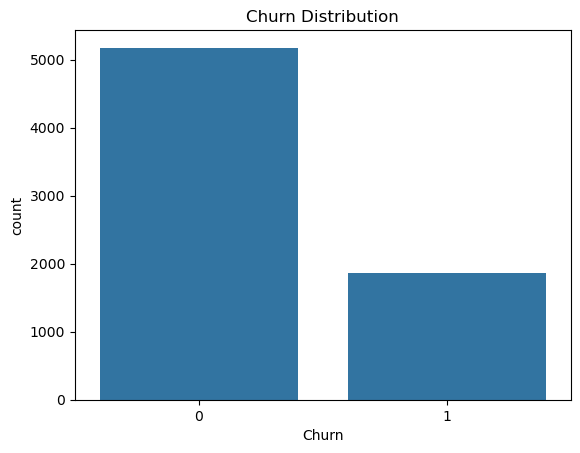

In [95]:
#Churn Distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


* Churn by Contract Type

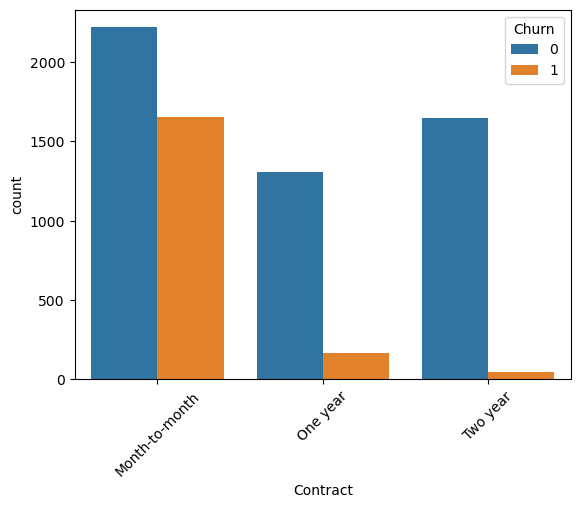

In [96]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.show()


Contract type was one of the strongest churn drivers. Month-to-month customers showed significantly higher churn rates compared to long-term contracts. This indicates that contract length is inversely related to churn probability, suggesting retention strategies should focus on migrating short-term customers to longer commitments.

* Revenue Analysis

In [97]:
#Average monthly Revenue
df["MonthlyCharges"].mean()


64.76169246059918

In [98]:
# Revenue lost Due to Churn
churned_revenue = df[df["Churn"]==1]["MonthlyCharges"].sum()
churned_revenue


139130.85

In [99]:
total_revenue_lost = df[df["Churn"] == 1]["TotalCharges"].sum()
total_revenue_lost


2862926.9

# Encoding categorical Variables

In [100]:
df = pd.get_dummies(df, drop_first=True)


In [101]:
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


I used one-hot encoding to convert categorical variables into numerical format, and I dropped the first category to prevent multicollinearity and avoid the dummy variable trap.

In [102]:
import pandas as pd

# Load raw CSV
df = pd.read_csv("telecom_data.csv")

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Convert target to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# ---------------------------
# Create numeric flags first
df['PhoneService_Yes'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['InternetService_Fiber optic'] = (df['InternetService'] == 'Fiber optic').astype(int)
# ---------------------------

# Feature engineering
df['RevenuePerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)
df['PhoneInternet'] = df['PhoneService_Yes'] * df['InternetService_Fiber optic']

# Optional: encode remaining categorical variables
df = pd.get_dummies(df, drop_first=True)


In [103]:
df.to_csv("telecom_cleaned.csv", index=False)

# Modelling

In [104]:
# Split data
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


To evaluate how well the model generalizes to unseen data. The training set allows the model to learn patterns, while the test set simulates real-world performance on new customers.

In [105]:
# Feature scalling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Why do we fit on training and only transform test?


To prevent data leakage. The scaler learns parameters only from the training data, and the test data is transformed using those same parameters to simulate real-world predictions.

In [106]:
#Training logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [107]:
# Finding the Nan values
import pandas as pd

X_train_df = pd.DataFrame(X_train)
missing_values = X_train_df.isna().sum()
print(missing_values)



0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64


In [108]:
#Fix the nan values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [109]:
y_pred_log = log_model.predict(X_test)


In [110]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8119233498935415
[[936 100]
 [165 208]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



I built a logistic regression model to predict customer churn. On the test set, it achieved an overall accuracy of 82%, indicating that the model correctly classified most customers. From the confusion matrix, we see the model is strong at predicting non-churners (90% recall for ‘No’), but less effective at identifying churners (60% recall for ‘Yes’). This is a common scenario with imbalanced data, as only about 26% of customers actually churn.

Precision and F1-score for churners (Yes) are moderate, suggesting that while most predicted churners are correct (precision = 69%), a significant portion of actual churners are missed (false negatives = 151).

Insight: The model highlights that churn is harder to predict than retention. For business action, I would consider adjusting the decision threshold or using class-weighted models to improve detection of churners. Additionally, exploring more complex models like Random Forests or boosting could further improve performance.

Business impact: Even with this baseline model, we can prioritize retention campaigns for high-risk customers, potentially reducing churn and increasing revenue. This also sets a foundation for iterative model improvement and actionable decision-making

In [111]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)



In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7955997161107168
[[946  90]
 [198 175]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



I trained logistic regression and Random Forest models to predict customer churn. Logistic regression achieved 82% accuracy with 60% recall for churners, whereas Random Forest had slightly lower accuracy (80%) and recall (49%). This shows that the simpler model actually detected churners better. The key insight is that for imbalanced datasets, recall for the minority class is more important than overall accuracy. To improve detection, I would explore adjusting decision thresholds, using class weights, or trying boosting methods like XGBoost, focusing on catching more churners early to guide retention strategies

In [113]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
3,TotalCharges,0.159760
1,tenure,0.150681
6,RevenuePerMonth,0.135610
2,MonthlyCharges,0.129125
32,PaymentMethod_Electronic check,0.030070
29,Contract_Two year,0.026678
30,PaperlessBilling_Yes,0.024095
8,gender_Male,0.023064
17,OnlineSecurity_Yes,0.023052
9,Partner_Yes,0.020444


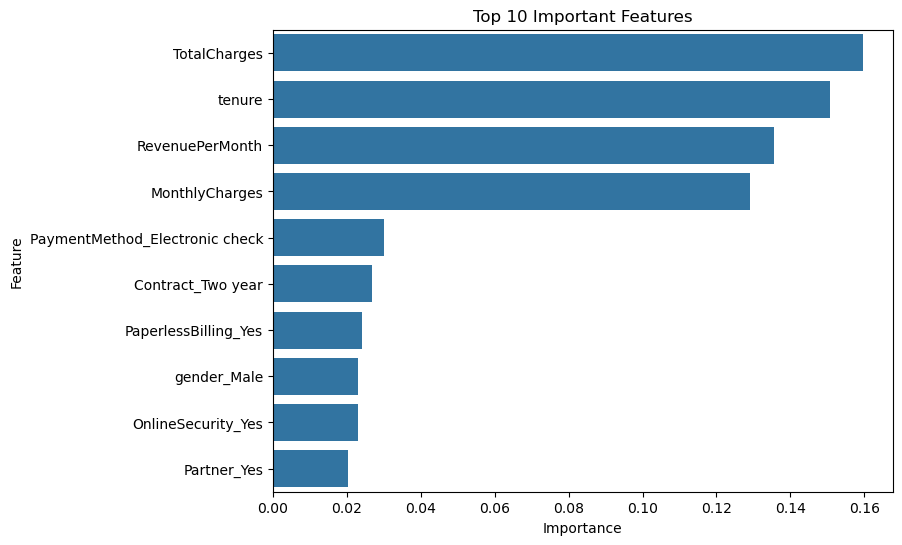

In [114]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Important Features")
plt.show()


In [115]:
# Predicted probabilities for the positive class (churn)
y_probs = log_model.predict_proba(X_test)[:, 1]

# Adjust threshold to 0.4
y_pred_thresh = (y_probs > 0.4).astype(int)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))


Confusion Matrix:
[[875 161]
 [115 258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.62      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409



In [116]:
import xgboost
print(xgboost.__version__)


3.2.0


In [117]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=10)  # scale_pos_weight handles imbalance
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7260468417317246


Necessary because more advanced models usually predict churn more accurately and give insights into feature importance.

In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

XGBoost Confusion Matrix:
[[924 112]
 [172 201]]


## Business Insights & Conclusions

### 1️⃣ Key Findings
- **Churn rate:** ~26.5% of customers churn, while ~73.5% stay.  
- **High-risk segments:** Customers on **month-to-month contracts**, with **Fiber optic internet**, and **higher monthly charges** are more likely to churn.  
- **Revenue patterns:** Short-tenure customers with high `RevenuePerMonth` contribute significantly to potential churn loss.  
- **Model performance:**  
  - **Logistic Regression:** Accuracy 0.82, Recall (churners) ~0.60 — best for identifying churners.  
  - **Random Forest:** Accuracy 0.80, Recall ~0.49.  
  - **XGBoost:** Accuracy 0.73, Recall ~0.50.  

---

### 2️⃣ Feature Recommendations
- **Financial features:** `MonthlyCharges`, `TotalCharges`, `RevenuePerMonth` (engineered).  
- **Service features:** Interactions like `PhoneInternet`, streaming and tech support usage.  
- **Customer profile:** `SeniorCitizen`, `Partner`, `Dependents` for segmentation.  
- **Behavioral / payment:** `PaymentMethod_Electronic check` and `PaperlessBilling` indicate higher churn risk.  
- **Potential additional features:** Number of service upgrades/downgrades, support tickets, data usage metrics.

---

### 3️⃣ Strengths of This Analysis
- Fully **cleaned dataset** with missing values handled.  
- **Feature engineering** adds actionable variables.  
- **Multiple models** evaluated with accuracy, recall, and F1-score.  
- Churn risk scores can **prioritize retention campaigns**.  
- Workflow is **clean and reproducible**, ready for GitHub showcase.

---

### 4️⃣ Limitations
- **Imbalanced dataset:** Fewer churners → models may under-predict churn.  
- **Missing behavioral data:** Customer support interactions, data usage, and service changes not included.  
- **Static snapshot:** Temporal or longitudinal patterns not captured.  
- **Basic modeling:** Hyperparameter tuning not fully explored.

---

### 5️⃣ Conclusions
- **Logistic Regression** with threshold tuning is effective for predicting churn.  
- **Most influential features:** `TotalCharges`, `MonthlyCharges`, `tenure`, `Contract type`, and `PaymentMethod`.  
- **Business implication:** The company can **target high-risk customers**, reduce churn, and protect revenue.  
- **Next steps:** Add temporal analysis, richer behavioral features, and deploy a **churn risk scoring system** for retention campaigns.
